library(ISLR)

?Smarket

package:ISLR                  R Documentation

S&P Stock Market Data

Description:

     Daily percentage returns for the S&P 500 stock index between 2001
     and 2005.

Usage:

     Smarket
     
Format:

     A data frame with 1250 observations on the following 9 variables.

     'Year' The year that the observation was recorded

     'Lag1' Percentage return for previous day

     'Lag2' Percentage return for 2 days previous

     'Lag3' Percentage return for 3 days previous

     'Lag4' Percentage return for 4 days previous

     'Lag5' Percentage return for 5 days previous

     'Volume' Volume of shares traded (number of daily shares traded in
          billions)

     'Today' Percentage return for today

     'Direction' A factor with levels 'Down' and 'Up' indicating
          whether the market had a positive or negative return on a
          given day

In [34]:
library(ISLR)
names(Smarket)
dim(Smarket)
summary(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

[1] 1250    9

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

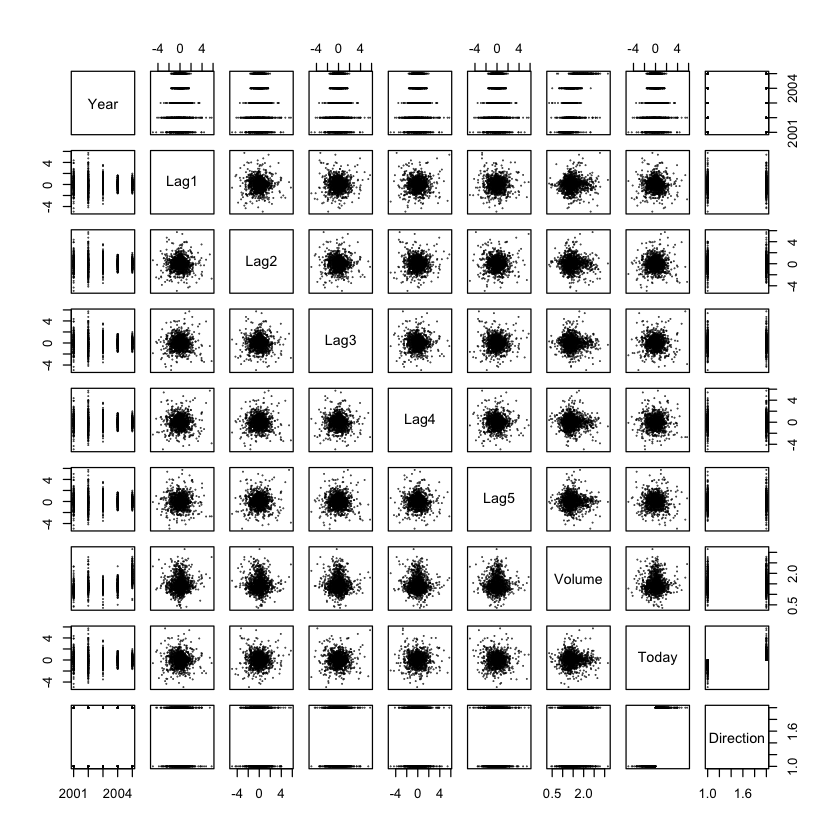

In [35]:
#plot correlation between dataset features 
pairs(Smarket, cex=0.1)

In [36]:
##correlation between all numeric columsn
print(cor(Smarket[,-9]))

             Year         Lag1         Lag2         Lag3         Lag4
Year   1.00000000  0.029699649  0.030596422  0.033194581  0.035688718
Lag1   0.02969965  1.000000000 -0.026294328 -0.010803402 -0.002985911
Lag2   0.03059642 -0.026294328  1.000000000 -0.025896670 -0.010853533
Lag3   0.03319458 -0.010803402 -0.025896670  1.000000000 -0.024051036
Lag4   0.03568872 -0.002985911 -0.010853533 -0.024051036  1.000000000
Lag5   0.02978799 -0.005674606 -0.003557949 -0.018808338 -0.027083641
Volume 0.53900647  0.040909908 -0.043383215 -0.041823686 -0.048414246
Today  0.03009523 -0.026155045 -0.010250033 -0.002447647 -0.006899527
               Lag5      Volume        Today
Year    0.029787995  0.53900647  0.030095229
Lag1   -0.005674606  0.04090991 -0.026155045
Lag2   -0.003557949 -0.04338321 -0.010250033
Lag3   -0.018808338 -0.04182369 -0.002447647
Lag4   -0.027083641 -0.04841425 -0.006899527
Lag5    1.000000000 -0.02200231 -0.034860083
Volume -0.022002315  1.00000000  0.014591823
Today  -0.

The following objects are masked from Smarket (pos = 5):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 6):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



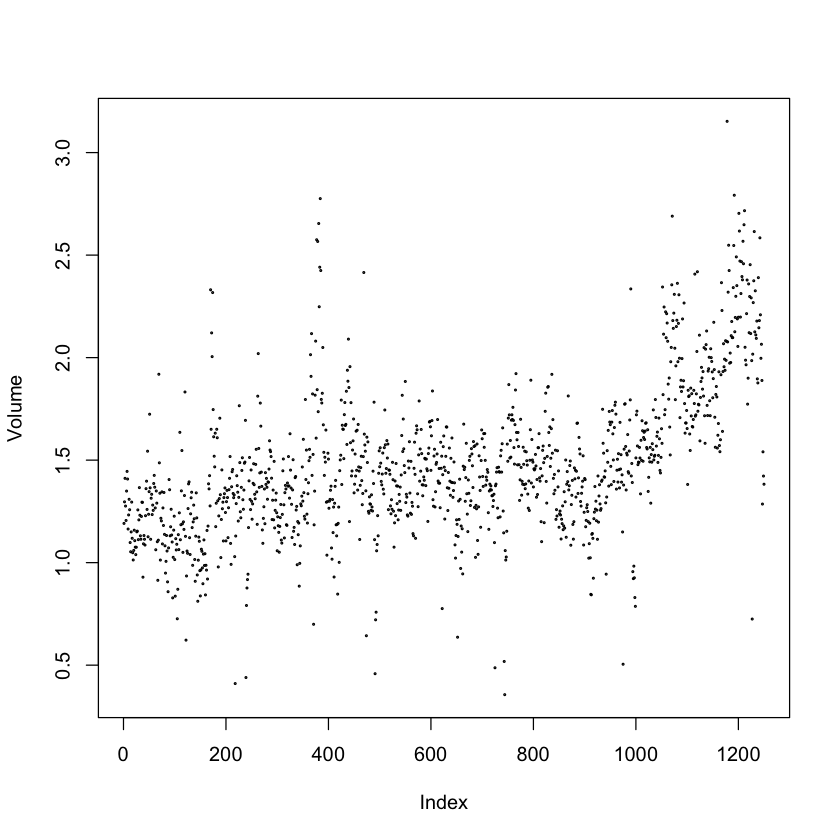

In [37]:
attach(Smarket)
#this shows that trading volume grows over time
plot(Volume, cex=0.2)

In [38]:
##logistic regression model. 
# we will fit a logistic regression model to predict direction using lag1 through lag5
#glm generalized linear model
glm.fit <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Smarket,family=binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [39]:
#predict direction using the training data  to store probabilities.
glm.probs <- predict(glm.fit, type="response")

#convert probabilities into a binar reponse  ? P> 0.5 : class 1 ; class b
 glm.pred<-rep("Down",length(glm.probs))
 glm.pred[glm.probs > .5] <- "Up"

print(glm.pred[1:10])

 [1] "Up"   "Down" "Down" "Up"   "Up"   "Up"   "Down" "Up"   "Up"   "Down"


In [40]:
##confusion matrix
attach(Smarket)
table(glm.pred, Direction)

The following objects are masked from Smarket (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 6):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 7):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [41]:
#how many points were correctly predicted
(145+507)/1250 # 1250 = length(glm.pred)

[1] 0.5216

In [42]:
#the same result  for confusion matrix
cfu_m <- table(glm.pred,Direction)
#rate of successfull prediction
(cfu_m[1,1]+cfu_m[2,2] )/ sum(cfu_m)
print(paste("percengate that model is correct:",mean(glm.pred == Direction)))
print(paste("training error rate is 1 - success rate:", 1 - mean(glm.pred == Direction)))
print("training erorr is computed on the whole dataset of 1250 data points")

[1] 0.5216

[1] "percengate that model is correct: 0.5216"
[1] "training error rate is 1 - success rate: 0.4784"
[1] "training erorr is computed on the whole dataset of 1250 data points"


In [43]:
#lets obtain a more realistic error rate on a subset of data used as training set 
#and check it on a test dataset  == Smarket[Year==2005,]
train_idx <- Smarket$Year<2005  ## index of datapoints to be part of train ds
train<- Smarket[train_idx,]  #defines train dataset = all datapoints before 2005
Smarket.2005<-Smarket[!train_idx,]
test<-Smarket.2005  # test data : all datapoints not in train dataset i.e. from 2005
print(dim(train))
print(dim(test))

[1] 998   9
[1] 252   9


In [44]:
head(train_idx)

[1] TRUE TRUE TRUE TRUE TRUE TRUE

In [45]:
#model on a train dataset.  same logic as above
glm.fit_tr <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume
	             ,data=train,family=binomial)
glm.probs_tst <- predict(glm.fit_tr, test, type="response")

glm.pred_tst<-rep("Down",length(glm.probs_tst))
glm.pred_tst[glm.probs_tst > .5] <- "Up"

In [46]:
#confusion matrix on the test dataset
cfu_m_tst <- table(glm.pred_tst,test$Direction)
print(cfu_m_tst)

print(paste("percengate model is correct on test data:",mean(glm.pred_tst == test$Direction)))
print(paste("training error rate on test data:", 1 - mean(glm.pred_tst == test$Direction)))

#as we can see the training error on test dataset from the model trained on train dataset
#is larger and > 50%

            
glm.pred_tst Down Up
        Down   77 97
        Up     34 44
[1] "percengate model is correct on test data: 0.48015873015873"
[1] "training error rate on test data: 0.51984126984127"


In [47]:
#lets refit the model using only 2 predictors with lowest  p-value i.e. lag1 and lag2

glm.fit_tr <- glm(Direction~Lag1+Lag2
	             ,data=train,family=binomial)
glm.probs_tst <- predict(glm.fit_tr, test, type="response")

glm.pred_tst<-rep("Down",length(glm.probs_tst))
glm.pred_tst[glm.probs_tst > .5] <- "Up"

cfu_m_tst <- table(glm.pred_tst,test$Direction)
print(cfu_m_tst)

print(paste("percengate model is correct on test data:",mean(glm.pred_tst == test$Direction)))
print(paste("training error rate on test data:", 1 - mean(glm.pred_tst == test$Direction)))


            
glm.pred_tst Down  Up
        Down   35  35
        Up     76 106
[1] "percengate model is correct on test data: 0.55952380952381"
[1] "training error rate on test data: 0.44047619047619"


### Linear Discriminant Analysis

In [48]:
require(MASS)
#run lda fit  on a train dataset
lda.fit <- lda(Direction~Lag1+Lag2,data = Smarket, subset = train_idx)
print(lda.fit)

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train_idx)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293


In [49]:
head(train_idx)

[1] TRUE TRUE TRUE TRUE TRUE TRUE

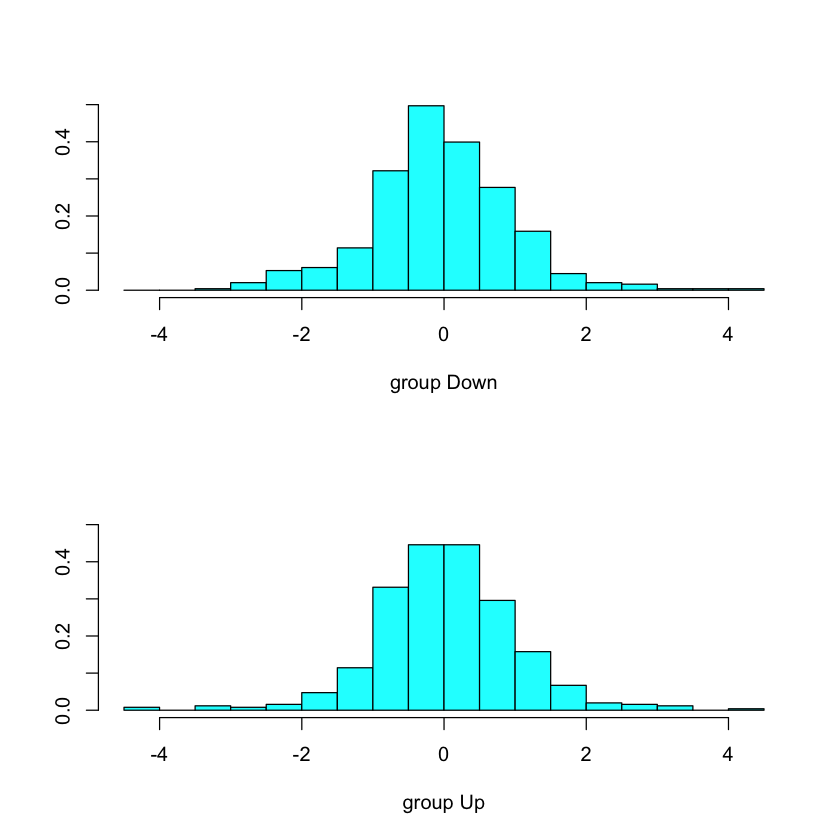

In [50]:
plot(lda.fit) #produces plots of linear discriminants
#i.e. linear combination of coefficients * predictors 


In [51]:
lda.pred <- predict(lda.fit, Smarket.2005) # on test data 
names(lda.pred) ## see structure of lda.pred object
lda.class <- lda.pred$class 
cfu_m_lda <- table(lda.class , test$Direction)
print(cfu_m_lda)
print(paste("lda model is correct on test data: ", mean(lda.class == test$Direction)))

[1] "class"     "posterior" "x"

         
lda.class Down  Up
     Down   35  35
     Up     76 106
[1] "lda model is correct on test data:  0.55952380952381"


In [52]:
## we can see that posterior probabilities determine the predicted clas
## s Up or Down
## the threshold of 50% is used 
head(lda.pred$posterior, n=20)
head(lda.pred$class, n=20)

,Down,Up
999,0.4901792,0.5098208
1000,0.4792185,0.5207815
1001,0.4668185,0.5331815
1002,0.4740011,0.5259989
1003,0.4927877,0.5072123
1004,0.4938562,0.5061438
1005,0.4951016,0.5048984
1006,0.4872861,0.5127139
1007,0.4907013,0.5092987
1008,0.4844026,0.5155974


[1] Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Down Up   Up   Up  
[16] Up   Up   Down Up   Up  
Levels: Down Up

### Quadratic discriminant Analysis

In [53]:
## redo the same fit 
qda.fit <- qda(Direction~Lag1+Lag2,data = Smarket, subset = train_idx)
print(qda.fit)

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train_idx)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544


In [54]:
qda.pred <- predict(qda.fit, Smarket.2005) # on test data 
qda.pred.class <- qda.pred$class 
cfu_qda_tst <- table (qda.pred.class, Smarket.2005$Direction)
print(cfu_qda_tst)
print(paste("qda model is correct on stet data: ", mean(qda.pred.class == Smarket.2005$Direction)))
## we can see the qda model yields better results than lda model

              
qda.pred.class Down  Up
          Down   30  20
          Up     81 121
[1] "qda model is correct on stet data:  0.599206349206349"


### K-Nearest Neighbors

We will see that QDA beats knn on predictive power

In [55]:
#knn is in library class
library(class)

#prepare data
train<- Smarket[train_idx,]
Smarket.2005<-Smarket[!train_idx,]

train.X <- cbind(train$Lag1, train$Lag2)
test.X <- cbind(Smarket.2005$Lag1, Smarket.2005$Lag2)

#define a function to make knn predictios for different values of k
getKnnPrediction <- function(train, test, train_y, test_y, k=1){ 
	set.seed (1)
	knn.pred <- knn(train,test,train_y, k=k)
	cfm_knn <- table(knn.pred, test_y)
	print(cfm_knn) 
    print(paste("knn model percentage of correct prediction for k =",k,":",
	      mean(knn.pred == test_y)))
}


In [56]:
#run model for k=1
getKnnPrediction(train=train.X, test=test.X,
	             train_y=train$Direction, test_y=Smarket.2005$Direction,k=1)

        test_y
knn.pred Down Up
    Down   43 58
    Up     68 83
[1] "knn model percentage of correct prediction for k = 1 : 0.5"


In [57]:
#run model for k=3  
# we observe a slight increase of predictive power
getKnnPrediction(train=train.X, test=test.X,
	             train_y=train$Direction, test_y=Smarket.2005$Direction,k=3)

        test_y
knn.pred Down Up
    Down   48 55
    Up     63 86
[1] "knn model percentage of correct prediction for k = 3 : 0.531746031746032"


In [58]:
#run a model for k=5
# we don't observe increase in predictive power
getKnnPrediction(train=train.X, test=test.X,
	             train_y=train$Direction, test_y=Smarket.2005$Direction,k=5)

        test_y
knn.pred Down Up
    Down   40 59
    Up     71 82
[1] "knn model percentage of correct prediction for k = 5 : 0.484126984126984"


## Application to Caravan Insurance Data 

In [59]:
print(names(Caravan))
print(dim(Caravan))
print(summary(Caravan$Purchase))
print(paste("purchase = yes prior probability:", sum(Caravan$Purchase == "Yes")/nrow(Caravan) ))

 [1] "MOSTYPE"  "MAANTHUI" "MGEMOMV"  "MGEMLEEF" "MOSHOOFD" "MGODRK"  
 [7] "MGODPR"   "MGODOV"   "MGODGE"   "MRELGE"   "MRELSA"   "MRELOV"  
[13] "MFALLEEN" "MFGEKIND" "MFWEKIND" "MOPLHOOG" "MOPLMIDD" "MOPLLAAG"
[19] "MBERHOOG" "MBERZELF" "MBERBOER" "MBERMIDD" "MBERARBG" "MBERARBO"
[25] "MSKA"     "MSKB1"    "MSKB2"    "MSKC"     "MSKD"     "MHHUUR"  
[31] "MHKOOP"   "MAUT1"    "MAUT2"    "MAUT0"    "MZFONDS"  "MZPART"  
[37] "MINKM30"  "MINK3045" "MINK4575" "MINK7512" "MINK123M" "MINKGEM" 
[43] "MKOOPKLA" "PWAPART"  "PWABEDR"  "PWALAND"  "PPERSAUT" "PBESAUT" 
[49] "PMOTSCO"  "PVRAAUT"  "PAANHANG" "PTRACTOR" "PWERKT"   "PBROM"   
[55] "PLEVEN"   "PPERSONG" "PGEZONG"  "PWAOREG"  "PBRAND"   "PZEILPL" 
[61] "PPLEZIER" "PFIETS"   "PINBOED"  "PBYSTAND" "AWAPART"  "AWABEDR" 
[67] "AWALAND"  "APERSAUT" "ABESAUT"  "AMOTSCO"  "AVRAAUT"  "AAANHANG"
[73] "ATRACTOR" "AWERKT"   "ABROM"    "ALEVEN"   "APERSONG" "AGEZONG" 
[79] "AWAOREG"  "ABRAND"   "AZEILPL"  "APLEZIER" "AFIETS"   "AINBOED" 
[85] "

In [60]:
## scale all numeric predictors to have  a standardized variance
standardized.X = scale(Caravan[,-86]) # all but the factor column , all cols have var = 1
var(Caravan[,1])
var(Caravan[,2])
var(standardized.X[,1])
var(standardized.X[,2])

[1] 165.0378

[1] 0.1647078

[1] 1

[1] 1

In [61]:
#split DS  to test (first 1000 data points ) and train the other 4822  
test_idx <- 1:1000
test.X <- standardized.X[test_idx,]
train.X <- standardized.X[-test_idx,]

test.Y <- Caravan[test_idx,]$Purchase
train.Y <- Caravan[-test_idx,]$Purchase

In [62]:
##redefine a knn prediction function 
getKnnPrediction <- function(train, test, train_y, test_y, k=1){ 
	set.seed (1)
	knn.pred <- knn(train,test,train_y, k=k)
	cfm_knn <- table(knn.pred, test_y)
	print(cfm_knn) 
#	print(paste("knn model percentage of correct prediction for k =",k,":",
#	            (cfm_knn[1,1] + cfm_knn[2,2])/sum(cfm_knn) ))
    print(paste("knn model percentage of correct prediction for k =",k,":",
	      mean(knn.pred == test_y)))

    print(paste("knn rate of response fist value for k=",k,":",
    	  sum(cfm_knn[1,1]/sum(cfm_knn[1,]))))

    print(paste("knn rate of response second value for k=",k,":",
    	  sum(cfm_knn[2,2]/sum(cfm_knn[2,]))))

}

In [63]:
#run knn predictisons for k=1,3,5
set.seed(1)
getKnnPrediction(train=train.X, test=test.X,
	             train_y=train.Y, test_y=test.Y,k=1)

getKnnPrediction(train=train.X, test=test.X,
 	             train_y=train.Y, test_y=test.Y,k=3)

getKnnPrediction(train=train.X, test=test.X,
 	             train_y=train.Y, test_y=test.Y,k=5)

        test_y
knn.pred  No Yes
     No  873  50
     Yes  68   9
[1] "knn model percentage of correct prediction for k = 1 : 0.882"
[1] "knn rate of response fist value for k= 1 : 0.945828819068256"
[1] "knn rate of response second value for k= 1 : 0.116883116883117"
        test_y
knn.pred  No Yes
     No  921  54
     Yes  20   5
[1] "knn model percentage of correct prediction for k = 3 : 0.926"
[1] "knn rate of response fist value for k= 3 : 0.944615384615385"
[1] "knn rate of response second value for k= 3 : 0.2"
        test_y
knn.pred  No Yes
     No  930  55
     Yes  11   4
[1] "knn model percentage of correct prediction for k = 5 : 0.934"
[1] "knn rate of response fist value for k= 5 : 0.944162436548223"
[1] "knn rate of response second value for k= 5 : 0.266666666666667"


In [64]:
##for comparison fit a logistic regression on Caravan 
glm.fit <- glm(Purchase~., data=Caravan,subset=-test_idx,family=binomial)
glm.probs <- predict(glm.fit, Caravan[test_idx,], type="response")

glm.predicted<-rep("No",length(test_idx))
glm.predicted[glm.probs > .5] <- "Yes"

cfm_glm <- table(glm.predicted, test.Y)
print("glm with probability threshold of 0.5")
print(cfm_glm)  # not a single "yes" predicted


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] "glm with probability threshold of 0.5"
             test.Y
glm.predicted  No Yes
          No  934  59
          Yes   7   0


In [65]:
##lets lower the probability threshold from 0.5 to .25
glm.predicted_bis<-rep("No",length(test_idx))
glm.predicted_bis[glm.probs > .25] <- "Yes"

cfm_glm_bis <- table(glm.predicted_bis, test.Y)
print("glm with probability threshold of 0.25")
print(cfm_glm_bis)  # not a single one preicted
print(paste("logistic model rate of response 2nd value ",  
	sum(cfm_glm_bis[2,2])/sum(cfm_glm_bis[2,]) ))

[1] "glm with probability threshold of 0.25"
                 test.Y
glm.predicted_bis  No Yes
              No  919  48
              Yes  22  11
[1] "logistic model rate of response 2nd value  0.333333333333333"
